In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

1.1. $\textbf{Caída con restitución}$

In [2]:

class Particle():
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id

    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
        self.r[0] += self.dt * self.v[0]
        self.r[1] += self.dt * self.v[1]
        self.v[1] += self.dt * self.a[1]
        
    def CheckWallLimits(self,limits,dim=2):
        
        if self.r[0] + self.radius > limits[0]:
            self.v[0] = - self.v[0]
        if self.r[0] - self.radius < - limits[0]:
            self.v[0] = - self.v[0] 
            
        if self.r[1] + self.radius > limits[1]:
            self.v[1] = - self.v[1] 
        if self.r[1] - self.radius < - limits[1]:
            if self.v[1] < 0:
                self.v[1] = - 0.9*self.v[1] #Factor que determina la pérdida de energía
            else:
                self.v[1] = 0.9*self.v[1]
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    
    def GetVPositionVector(self):
        return self.VvVector 

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) 
        self.VvVector = np.array([self.vVector[0]]) 
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                self.VvVector = np.vstack([self.VvVector,self.vVector[i]]) #Reducción vector velocidad

In [3]:
dt = 0.01
tmax = 35
t = np.arange(0,tmax+dt,dt)

In [4]:
def GetParticles(NParticles,Limit,Dim=2,dt=dt):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.array([-15.,5.])
        v0 = np.array([1.,0.])
        a0 = np.array([0.,-9.8])
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_

In [5]:
Limits = np.array([20.,20.])

In [6]:
def RunSimulation(t,NParticles = 1):
    
    Particles = GetParticles(NParticles,Limits[0],dt=dt)
    
    for it in tqdm(range(len(t))): 
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it)
        
        
    return Particles

In [7]:
Particles = RunSimulation(t)

100%|██████████| 3501/3501 [00:00<00:00, 41126.39it/s]


In [8]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [9]:
redt = ReduceTime(t,10) #factor de reducción

<IPython.core.display.Javascript object>


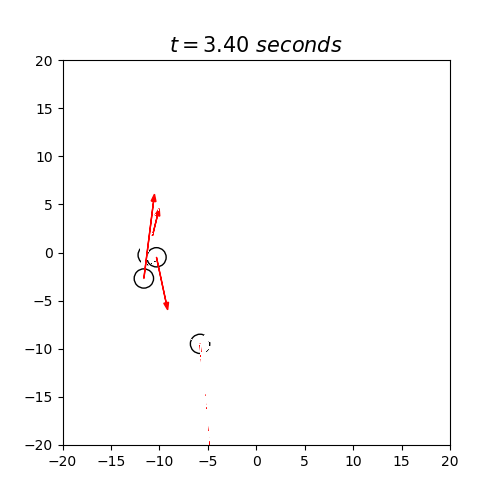

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        
        vx = p.GetVPositionVector()[i,0]
        vy = p.GetVPositionVector()[i,1]
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False)
        plot = ax.add_patch(circle)
        plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

In [11]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=50, metadata=dict(artist='Me'))
Animation.save('FallingBall.mp4', writer=writer_)

<IPython.core.display.Javascript object>


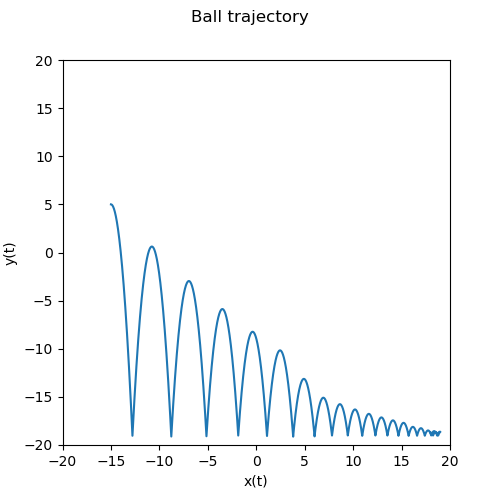

In [20]:
fig2= plt.figure(figsize=(5,5))
ax2 = fig2.add_subplot(1,1,1)
def init2():
    ax2.set_xlim(-Limits[0],Limits[0])
    ax2.set_ylim(-Limits[1],Limits[1])
    ax2.set_xlabel("x(t)")
    ax2.set_ylabel("y(t)")
    
    
plot2= ax2.clear()
init2()
fig2.suptitle("Ball trajectory")
ax2.plot(Particles[0].GetPositionVector()[:,0],Particles[0].GetPositionVector()[:,1])

 $\textbf{(a)}$ En un intervalo de 30 segundos, como se evidencia en la gráfica, el balón sigue rebotando. Al ampliar el intervalo a 35 segundos, vemos que el balón deja de rebotar y se choca con la pared lateral de la caja (esto también se evidencia en la animación). 

$\textbf{(b)}$ Energía mecánica de la pelota como una función del tiempo.

<IPython.core.display.Javascript object>


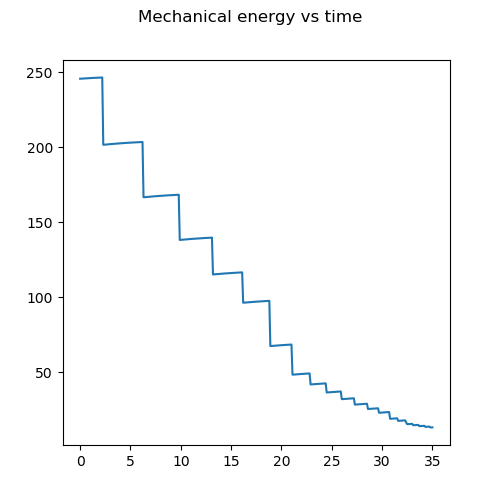

Text(0.5, 0.98, 'Mechanical energy vs time')

In [40]:
fig3 = plt.figure(figsize=(5,5))
ax3 = fig3.add_subplot(1,1,1)
E=[]
for j in range(len(redt)):
    for p in Particles:
        y = p.GetRPositionVector()[j,1]
        vx = p.GetVPositionVector()[j,0]
        vy = p.GetVPositionVector()[j,1]
        E_cin= 0.5*(vx**2+vy**2)
        E_pot= (y+20)*9.81
        E_mec= E_cin+E_pot
        E.append(E_mec)
ax3.plot(redt,E)
fig3.suptitle("Mechanical energy vs time")